In [1]:
import ROOT as rt
import root_numpy as rtnp
import numpy as np
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list

import CMS_lumi, tdrstyle
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "     Simulation Preliminary"

donotdelete = []

Welcome to JupyROOT 6.13/02


In [2]:
fpath = {}
tree = {}
process = {}
process_short = {}

fpath['m500ctau300'] = '/home/cms/Desktop/LLP/jetNtuple_4jet/jetNtuple_M-500_CTau-1000mm.root'
process['glueBall'] = 'pp #rightarrow h*h* #rightarrow jj#nu#nu'
process_short['glueBall'] = 'pp #rightarrow h*h* #rightarrow jj#nu#nu'

#fpath['tau'] = '../data/cmsMC_private/BPH_Tag-Bm_D0kpmunu_Probe-B0_TauNuDmst-pD0bar-kp-tau2mununu_NoPU_10-2-3_v0/BPH_Tag-Bm_D0kpmunu_Probe-B0_TauNuDmst-pD0bar-kp-tau2mununu_BPHMC_merged_1-300.root'
#process['tau'] = 'B_{0} #rightarrow D*^{-}(#bar{D}_{0}(K^{+}#pi^{-})#pi^{-})#tau^{+}(#mu^{+}#nu#bar{#nu})#nu'
#process_short['tau'] = 'B #rightarrow D*#tau#nu'

# fpath['Dst_mu'] = '../data/cmsMC_private/BPH_Tag-Bm_D0kpmunu_Probe-Bp_D0stkpNeumunu_NoPU_10-2-3_v0/BPH_Tag-Bm_D0kpmunu_Probe-Bp_D0stkpNeumunu_BPHMC_merged.root'
# process['Dst_mu'] = 'B^{+} #rightarrow #bar{D}^{*}_{0}(D_{0} n#gamma)#mu^{+}#nu'

# fpath['Dst_tau'] = '../data/cmsMC_private/BPH_Tag-Bm_D0kpmunu_Probe-Bp_D0stkpNeutaunu_tau2mununu_NoPU_10-2-3_v0/BPH_Tag-Bm_D0kpmunu_Probe-Bp_D0stkpNeutaunu_tau2mununu_BPHMC_merged.root'
# process['Dst_tau'] = 'B^{+} #rightarrow #bar{D}^{*}_{0}(D_{0} n#gamma)#tau^{+}(#mu^{+}#nu#nu)#nu'

for k,v in fpath.iteritems():
    print k, v
    tree[k] = rtnp.root2array(v)
    #tree[k] = rtnp.tree2array(v)
    #jet_max_pt_array = [np.max(x) for x in tree[k]["jetPt"]]
    a = tree[k]["jetPt"]
    print a[:-1][0]

m500ctau300 /home/cms/Desktop/LLP/jetNtuple_4jet/jetNtuple_M-500_CTau-1000mm.root
[297.68796  137.73749  118.9409    93.412476  40.06718   38.659866
  24.338118  17.470255  17.31582   11.373936  11.326995  10.481265]


In [3]:
T = tree['m500ctau300']

In [4]:
#get first jet pt per event
#T['jetPt'][0]
first_jet_pt = [x[0] if len(x) else -1 for x in T['jetPt']]
print(len(first_jet_pt))

10000


In [5]:
#get max jet pt per event, also jet[0]
max_jet_pt = np.array([np.max(x) if len(x) else -1 for x in T['jetPt']])
max_jet_ecal_energy = np.array([x[0] if len(x) else -1 for x in T['jet_rechit_E']])
max_jet_ecal_energy1 = np.array([x[0] if len(x) else -1 for x in T['jet_rechit_E_Ecut1']])
max_jet_ecal_energy2 = np.array([x[0] if len(x) else -1 for x in T['jet_rechit_E_Ecut2']])

assert(len(max_jet_ecal_energy) == len(max_jet_pt))
print(len(max_jet_ecal_energy))
print(len(max_jet_pt[max_jet_ecal_energy<50]))
# print max_jet_pt

10000
3562


In [6]:
# Create 2d numpy array matched-jets vs. LLP decay radius
matched_jet = np.array([4-np.count_nonzero(x == 666) if len(x) else -1 for x in T['gLLP_daughter_match_jet_index']])
matched_jet_perllp = np.array([[2-np.count_nonzero(x[:2] == 666), 2-np.count_nonzero(x[2:] == 666)] if len(x) else -1 for x in T['gLLP_daughter_match_jet_index']])

gLLP_decay_radius = np.sqrt(np.square(T['gLLP_decay_vertex_x'])+np.square(T['gLLP_decay_vertex_y'])) # (events, 2) 2LLP
# gLLP_decay_radius = np.reshape(gLLP_decay_radius,(-1,1)) # flatten (2*events, 1)


n_rechits = np.array( [x if len(x) else -1 for x in T['jet_n_rechits']]) 
n_rechits = [] #n_rechits of matched jets
n_rechits_llpdecay = [] # rechits and the corresponding LLP decay length
for i in range(len(T['gLLP_daughter_match_jet_index'])):
    x = T['gLLP_daughter_match_jet_index'][i]
    for j in range(len(x)):
        if not x[j] == 666:
            n_rechits.append(T['jet_n_rechits'][x[j]])
            if j <= 1:
                llpid = 0
            else:
                llpid = 1
#             print(T['jet_n_rechits'][i][x[j]])
            n_rechits_llpdecay.append([T['jet_n_rechits'][i][x[j]], gLLP_decay_radius[i,llpid]])
#             if T['jet_n_rechits'][i][x[j]] == 0:
#                 print gLLP_decay_radius[i,llpid]
            
n_rechits_llpdecay = np.array(n_rechits_llpdecay)
matched_jet_perllp = np.reshape(matched_jet_perllp,(-1,1))
gLLP_decay_radius = np.reshape(gLLP_decay_radius,(-1,1))


max_rechit_E = np.array([np.max(x) if len(x) else -1 for x in T['jet_rechits_E']])
print("number of matched jets:",np.unique(matched_jet,return_counts=True))
# Create 2d numpy array n_rechits vs. max_rechits
# Create 2d numpy array with n_rechits vs. LLP decay radius


('number of matched jets:', (array([0, 1, 2, 3, 4]), array([ 799, 2190, 3279, 2661, 1071])))


((10000,), (10000,))


Info in <TCanvas::Print>: pdf file max_jet_ecal_energy.pdf has been created


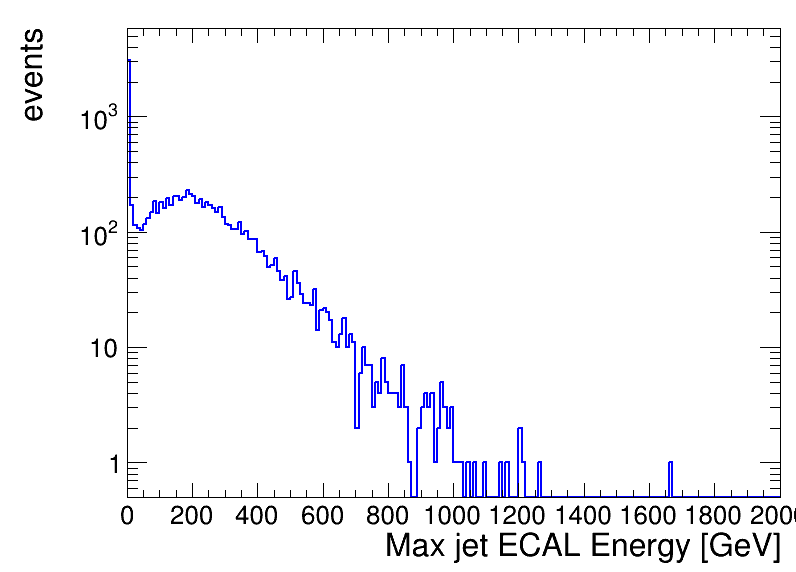

In [112]:
c = rt.TCanvas('c','c', 800, 600)
h = {}
print(max_rechit_E.shape,max_jet_ecal_energy.shape)
h['max_jet_ecal'] = create_TH1D( max_jet_ecal_energy, axis_title=['Max jet ECAL Energy [GeV]', 'events'], name='max_jet_ecal', binning=[200,0,2000])
h['max_jet_ecal'].SetLineColor(4)
c.SetLogy()
h['max_jet_ecal'].Draw()
c.Draw()
c.SaveAs("max_jet_ecal_energy.pdf")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file max_jet_pt.pdf has been created


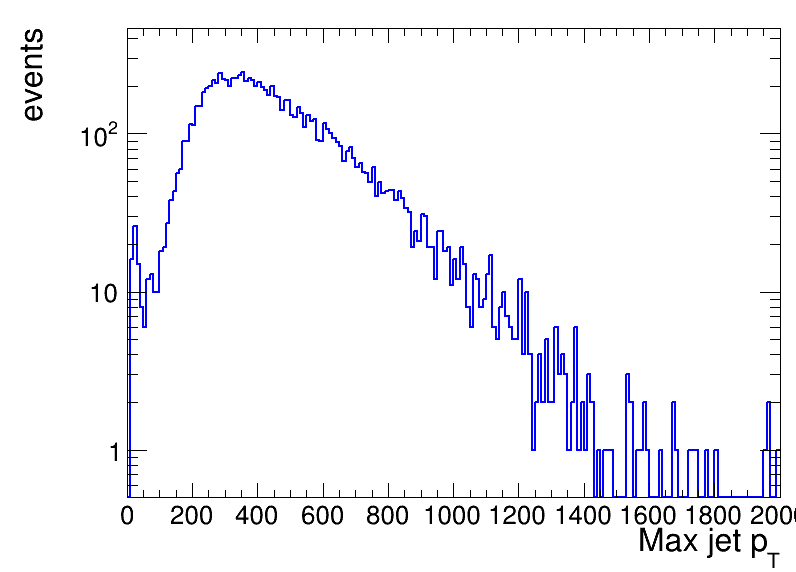

In [113]:
c = rt.TCanvas('c','c', 800, 600)
h = {}
h['max_jet_pt'] = create_TH1D(max_jet_pt, axis_title=['Max jet p_{T}', 'events'], name='max_jet_pt', binning=[200,0,2000])
h['max_jet_pt'].SetLineColor(4)
c.SetLogy()
h['max_jet_pt'].Draw()
c.Draw()
c.SaveAs("max_jet_pt.pdf")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file n_rechits_zoomin.pdf has been created


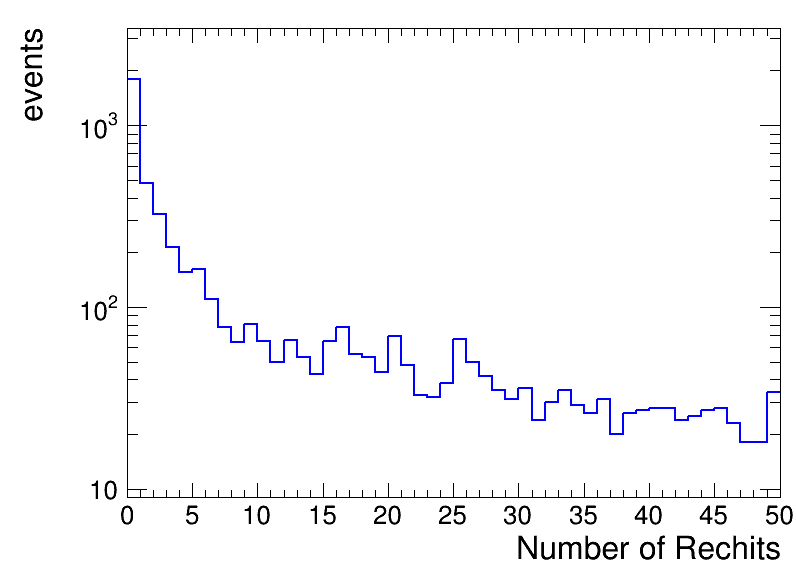

In [228]:
c = rt.TCanvas('c','c', 800, 600)
h = {}
h['n_rechits'] = create_TH1D(n_rechits_llpdecay[:,0], axis_title=['Number of Rechits', 'events'], name='n_rechits', binning=[50,0,50])
h['n_rechits'].SetLineColor(4)
c.SetLogy()
h['n_rechits'].Draw()
c.Draw()
c.SaveAs("n_rechits_zoomin.pdf")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file gLLP_decay_radius.pdf has been created


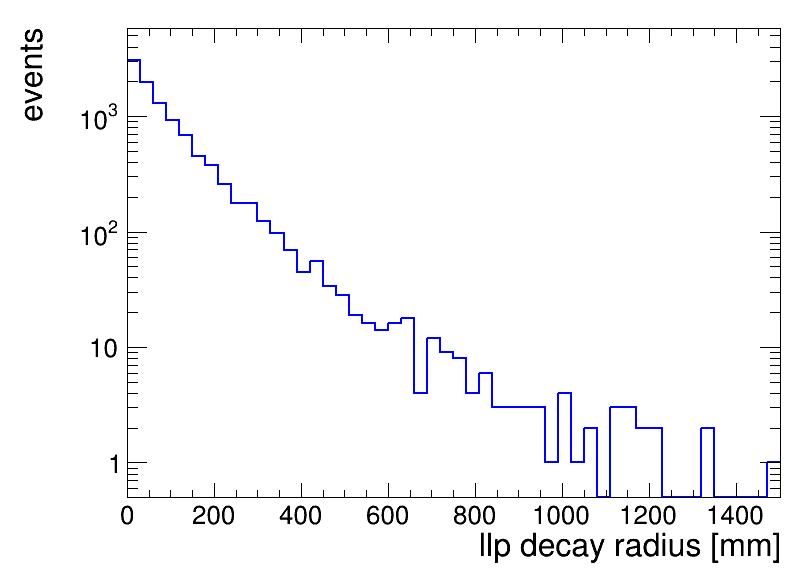

In [227]:
c = rt.TCanvas('c','c', 800, 600)
# print(np.mean(gLLP_decay_radius[:,0],axis=1))
h = {}
h['gLLP_decay_radius'] = create_TH1D(gLLP_decay_radius[:,0] , axis_title=['llp decay radius [mm]', 'events'], name='gLLP_decay_radius', binning=[50,0,1500])
h['gLLP_decay_radius'].SetLineColor(4)

c.SetLogy()
h['gLLP_decay_radius'].Draw()
c.Draw()
c.SaveAs("gLLP_decay_radius.pdf")


# Create 2d numpy array n_rechits vs. max_rechits# Create 2d numpy array with n_rechits vs. LLP decay radius

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


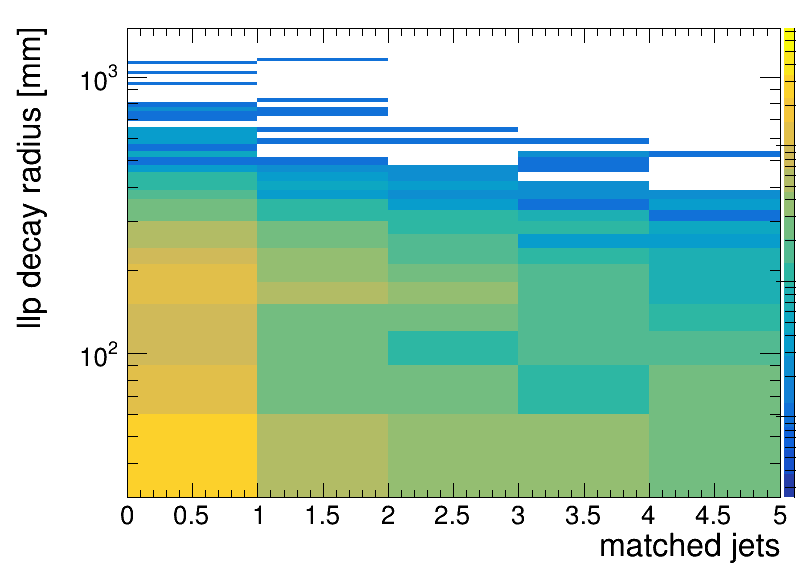

In [97]:
c = rt.TCanvas('c1','c1', 800, 600)

# Create 2d numpy array matched-jets vs. LLP decay radius
h = {}

h['jet_llpdecay'] = create_TH2D(n_rechits_llpdecay, axis_title = ['matched jets','llp decay radius [mm]',''], binning=[5,0,5,50,0,1500])
h['jet_llpdecay'].Draw('colz')
c.SetLogy()
c.SetLogz()
c.Draw()

19524.0
0
533.0
1
59.0
2


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TH1D::Rebin>: ngroup=3 is not an exact divider of nbins=500.
Warning in <TH1D::Rebin>: ngroup=3 is not an exact divider of nbins=500.
Warning in <TH1D::Rebin>: ngroup=3 is not an exact divider of nbins=500.
Warning in <TH1D::Rebin>: ngroup=3 is not an exact divider of nbins=166.
Info in <TCanvas::Print>: pdf file rechit_llpdecay.pdf has been created


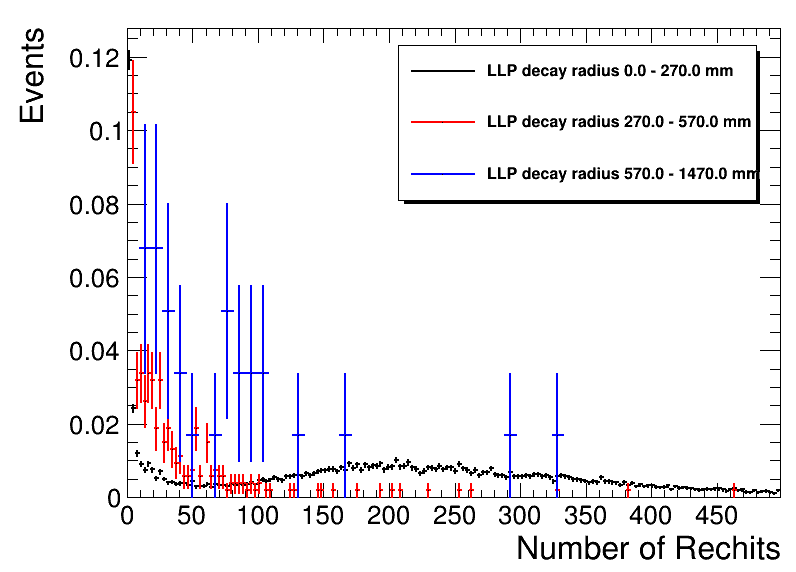

In [37]:
# Look at the number of rechits per jets in different LLP decay radius bin
c = rt.TCanvas('c1','c1', 800, 600)
leg = rt.TLegend(0.5,0.65,0.95,0.92)
# leg.SetTextFont(42)
leg.SetTextSize(0.03)
leg.SetEntrySeparation(0.01)
# # Create 2d numpy array matched-jets vs. LLP decay radius
h = {}
proj = []
bin_low, bin_up = 30,50
h['rechit_llpdecay'] = create_TH2D(n_rechits_llpdecay, axis_title = ['Number of Rechits','llp decay radius [mm]',''], binning=[500,0,500,50,0,1500])
bins = [1,10,20,50]
for i in range(len(bins)-1):
    key = 'bin'+str(i)
    proj.append(h['rechit_llpdecay'].ProjectionX("h"+str(i),bins[i],bins[i+1]-1))
    y_low = h['rechit_llpdecay'].GetYaxis().GetBinLowEdge(bins[i])
    y_up = h['rechit_llpdecay'].GetYaxis().GetBinLowEdge(bins[i+1]-1)+h['rechit_llpdecay'].GetYaxis().GetBinWidth(1)
    leg.AddEntry(proj[i],'LLP decay radius '+str(y_low)+' - '+str(y_up)+' mm')

proj[0].GetYaxis().SetTitle("Events")
proj[0].GetYaxis().SetRangeUser(0,1)
for i in range(len(bins)-1):
    proj[i].SetLineColor(i+1)
    proj[i].Rebin(3)
    print(proj[i].Integral())
    proj[i].Scale(1./proj[i].Integral())
#     proj[i].GetYaxis().SetRangeUser(0,1)

    if i == 0:
        proj[i].DrawCopy()
    if i == 2:
        proj[i].SetLineColor(4)
        proj[i].Rebin(3)

    proj[i].DrawCopy('SAME')
    print (i)
# proj[2].GetYaxis().SetRangeUser(0,1)

# h1.Scale(1./h1.Integral())
leg.Draw()
# # c.SetLogy()
# # c.SetLogz()
c.Draw()
# print(h['matchjet_llpdecay'].GetYaxis().GetBinCenter(bin_low))
# y_low = h['matchjet_llpdecay'].GetYaxis().GetBinCenter(bin_low)
# y_up = h['matchjet_llpdecay'].GetYaxis().GetBinCenter(bin_up)
c.SaveAs('rechit_llpdecay.pdf')


0
1
2


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file matchjet_llpdecay.pdf has been created


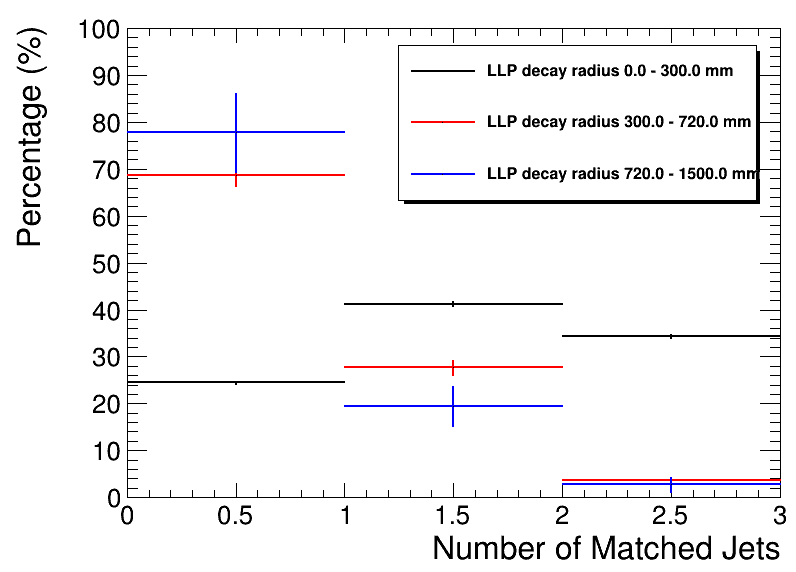

In [18]:
# Look at the number of matched jets in different LLP decay radius bin
c = rt.TCanvas('c1','c1', 800, 600)
leg = rt.TLegend(0.5,0.65,0.95,0.92)
# leg.SetTextFont(42)
leg.SetTextSize(0.03)
leg.SetEntrySeparation(0.01)
# # Create 2d numpy array matched-jets vs. LLP decay radius
h = {}
proj = []
matchjet_llpdecay = np.column_stack((matched_jet_perllp, gLLP_decay_radius))
bin_low, bin_up = 30,50
h['matchjet_llpdecay'] = create_TH2D(matchjet_llpdecay, axis_title = ['Number of Matched Jets','llp decay radius [mm]',''], binning=[3,0,3,50,0,1500])
bins = [1,11,25,51]
for i in range(len(bins)-1):
    key = 'bin'+str(i)
    proj.append(h['matchjet_llpdecay'].ProjectionX("h"+str(i),bins[i],bins[i+1]-1))
    y_low = h['matchjet_llpdecay'].GetYaxis().GetBinLowEdge(bins[i])
    y_up = h['matchjet_llpdecay'].GetYaxis().GetBinLowEdge(bins[i+1]-1)+h['matchjet_llpdecay'].GetYaxis().GetBinWidth(1)
    leg.AddEntry(proj[i],'LLP decay radius '+str(y_low)+' - '+str(y_up)+' mm')

proj[0].GetYaxis().SetTitle("Percentage (%)")
proj[0].GetYaxis().SetRangeUser(0,1)
for i in range(len(bins)-1):
    proj[i].SetLineColor(i+1)
    proj[i].Scale(100./proj[i].Integral())
    proj[i].GetYaxis().SetRangeUser(0,100)

    if i == 0:
        proj[i].DrawCopy()
    if i == 2:
        proj[i].SetLineColor(4)
    proj[i].DrawCopy('SAME')
    print (i)
proj[2].GetYaxis().SetRangeUser(0,100)

# h1.Scale(1./h1.Integral())
leg.Draw()
# # c.SetLogy()
# # c.SetLogz()
c.Draw()
# print(h['matchjet_llpdecay'].GetYaxis().GetBinCenter(bin_low))
# y_low = h['matchjet_llpdecay'].GetYaxis().GetBinCenter(bin_low)
# y_up = h['matchjet_llpdecay'].GetYaxis().GetBinCenter(bin_up)
c.SaveAs('matchjet_llpdecay.pdf')
